1. Perform combined over and undersampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works.

In diabetes dataset, the healthy population is almost twice as large as sick population. The lack of balance between the two classes can create problems when training models - accuracy metric of such model would be misleading. To solve this, combined sampling can be used. Combined sampling is a hybrid approach that utilizes both over-sampling and under-sampling methods together. 

Oversampling methods duplicate or create new synthetic examples in the minority class, whereas undersampling methods delete or merge examples in the majority class. SMOTEEN is a combination of SMOTE (Synthetic Minority Oversampling Technique) and ENN which stands for Edited Nearest Neighbors. SMOTE (oversampling) creates (not duplicates) new syntetic data points that are slightly different from the original data points. ENN, on the other hand, is an undersampling method that removes certain observations and their K-nearest neighbor if the observation and its KNN-majority are in different classes which would result in reduction of data points closer to the border. Both types of resampling can be effective when used in isolation, although they can be even more effective when both types of methods are used together.

In [2]:
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
daibates_df = pd.read_csv('diabetes.csv')
daibates_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
daibates_df.info()# checking missing values in the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
daibates_df.isnull().sum() # checking  any null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
daibates_df['Outcome'].value_counts() # data are imbalanced where the majority class belongs to the '0' label and the minority class belongs to the '1' label.

0    500
1    268
Name: Outcome, dtype: int64

In [53]:
X = daibates_df.drop('Outcome',axis=1) # Features
y = daibates_df['Outcome'] # Target

from sklearn.model_selection import train_test_split
# Split into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify=y)

from sklearn.preprocessing import StandardScaler
#Strandardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [54]:
y_train.value_counts() # as we can see our 1 classes lest then 0 classes


0    350
1    187
Name: Outcome, dtype: int64

In [55]:
combain_over_under = SMOTEENN(random_state = 42)
X_train,y_train = combain_over_under.fit_resample(X_train,y_train)

In [56]:
y_train.value_counts()# after SMOTEENN we can see that 1 classes had increased 0 clases had dicrec


1    211
0    187
Name: Outcome, dtype: int64

2. Perform logistic regression with the new data from question 1.

a. Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset.

In [57]:
from sklearn.linear_model import LogisticRegression
#train using resampled data
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [58]:
#calculate accuracy
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7640740740740741

In [59]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.71      0.81      0.79      0.76      0.58       150
          1       0.61      0.81      0.71      0.69      0.76      0.59        81

avg / total       0.78      0.75      0.78      0.75      0.76      0.58       231



we can see that when we used SMOTEENN improve the accuracy score and recall  

this screenshot when we not used SMOTEENN and accuracy and recall very low thats mean data model not very well demonstrated.

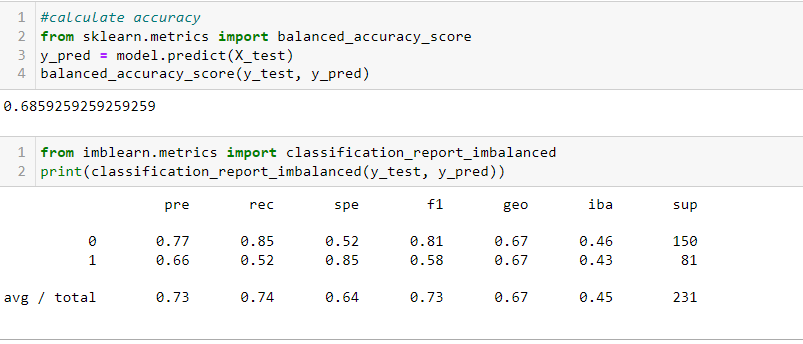

3. Create an ROC Curve for the model https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html and calculate the AUC.

a. BRIEFLY explain what the ROC Curve shows and what the resulting AUC means

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict_proba(X_test)[:,1] # for 1 clases
roc_auc_score(y_test,y_pred_prob)


0.8366255144032921

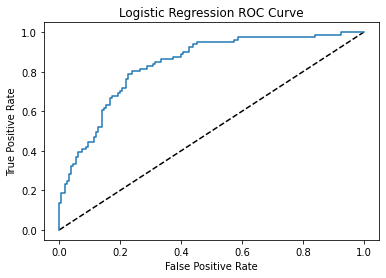

In [69]:
fpr,tpr, thresholds = roc_curve(y_test,y_pred_prob)
#fpr,tpr, thresholds
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

The ROC curve stands for Receiver Operating Characteristics curve. ROC curve summarizes the prediction performance of a classification model at various classification thresholds. Particularly, the ROC curve plots the False Positive Rate(FPR) on the X-axis and the True Positive Rate(TPR) on the Y-axis. Formula for TPR(Sensitivity) is TP/(TP+FN). Formula for FPR (1-Specificity) is FP/(TN+FP). 

In the above plot, ROC shows as expected that as we move the threshold to capture more true positives, we end up capturing more false positives as well. It would be ideal if ROC curve had a (0, 1) value which would mean that at a certain threshold all true positives can be captured while false positives are kept at zero. The fact that our ROC curve does not have that value tells us that the model is not perfect in its ability to separate positives from negatives which is expected. On the other hand, it is good news that the ROC curve is not on the dashed diagonal line in the middle - that means that our model is better than random guessing in being able to differentiate between classes. 

ROC curve can help us pick the optimal threshold to use for our predictions depending on the problem we are solving. For example, we can assume in diabetes analysis case that it is acceptable to have some false positive while we capture vast majority of true positives (missed positives can be very costly from human life and health standpoint) - looking at this ROC curve I would be inclined to pick a threshold that would give me 0.9+ TPR with about 0.5 FPR. However, if this ROC curve was for a spam detection/prevention model, I'd be inclined to go with a threshold that would give me a lower FPR and have a lower TPR as trade-off since a missed "good email" is more costly than un-detected "spam email". 

AUC stands for Area Under the Curve which is the ROC Curve - the larger the area is the better.  AUC helps measure and visualize the performance of classification models by providing a measure of separability. In other words, it shows us how good the model can differentiate between classes. In this specific case, AUC is telling us how good the model is in differentiating between patients with disease and healthy patients - the AUC is 0.837 which is greater than 0.5. It means that while the model is not ideal (AUC not equal to 1), it has significant value in being able to differentiate between sick and healthy patients. 

4. What is outlier detection? Why is it useful? What methods can you use for outlier detection?


Outlier detection is the process of detecting outliers, or a data point that is far away from the average, and depending on what you are trying to accomplish, potentially removing or resolving them from the analysis to prevent any potential skewing. Outlier detection is one of the most important processes taken to create good, reliable data.

Outlier detection is important for two reasons.Outliers correspond to the aberrations in the datset,outlier detection can help detect fraudulent bank transactions.Consider the scenario where most of the bank transactions of a particular customer take place from a certain geographical location.


1- Standard Deviation outlier detection method
The first method is a very simple one that you can use to quickly get rid of extreme value. It is not the most robust one, but if outliers but is much simpler to implement than the other methods.

2 – Z-score outlier detection method
This technique is slightly more advanced than the previous one used in the sense that you can set the amount of standard deviation away from the mean for the points to be considered as outliers.

3- Tukey’s box plot 
This is a more visual way to detect outliers. See the box plot we used to identify what feature may have a lot of outliers? We are simply going to translate that plot into code and use the statistical concept behind that plot to extract the outliers. If you know how to read a boxplot, then understanding how this works should not be a problem.

 
One advantage of using this technique is the ability to distinguish between potential outliers and definite outliers (almost definite since one can never be 100% sure). Looking at the table, a probable outlier would be a data point situated between the outer and inner fence. A definite outlier, on the other hand, would be located outside the outer fence.

4- Median Absolute Deviation outlier detection
Robustness, as you may notice, is very important when it comes to outliers detection. The idea behind Median Absolute Deviation is to replace the mean and the standard deviation with more robust statistical measures, such as the median and the median absolute deviation.

5 – Elliptic Enveloppe method
The basic idea of the Elliptic Envelope method is to draw an ellipse around the data. The data points within the ellipse are doing to be your normal data points and the ones outside it are going to be your outliers. The quite simple technique is very easily implementable.

6- Mahalanobis Distance method
The Mahalanobis Distance is a widely used technique for outliers detection especially when it comes to contextual outlier detection. The idea behind this technique is to measure the distance between data points and distribution. 

Based on the type of your project, there are four ways I can think of when it comes to handling outliers.

1-Mark them - marking outliers is the easiest method to deal with outliers.Using this technique allow us to analyze the outliers to see if they had an effect. The inconvenience of simply marking is that it makes the data set more complicated than it needs to. I mean we are adding new features to the data.For all the above examples, I have been marking the outliers. I did it by saving the outliers in an array of 0 and 1, with 0 = not outlier and 1 = outlier. Then I appended said array to the data dataframe. 

2-Replace them - Another way of dealing with outliers in data mining is simply replacing them with one of the point statistics. Mean, Median, Q1|Q3, mode, etc.

3- Remove them-Dropping outliers is yet another way to handle outliers in data mining. It should not be your go-to way of handling outliers since you will lose so much information in the data if you drop every outlier you encounter. Generally, you should drop the outliers that are due to an error in measurement (40C in the North Pole)/ mistake, or create a relationship that should not be there (eg. 1 red ball amongst 99 green balls). Then you can drop them. In any other case, you can still drop them, but it is advisable to leave a note on dropping those points and how dropping them affected the results.

4-Rescale them - Another option to deal with outliers is to rescale them. Decreasing the range does decrease the impact of the outliers. Besides using log or square root transformations, you can take advantage of the robust scalers to reduce outlier’s impact on your models. Indeed, the standard standardization algorithm is sensitive to outliers since its formula ( x’ = (X – mean) / standard deviation. The mean is not as robust to outliers than the meadian. The robust data scaler takes advantage of the robust meadian and the IQR to rescale the data. In here., X’ = (X – median) / (Q3 – Q1)
As a result, we will have a distribution with a mean of 0 and a standard deviation of 1. This is great because the distribution will not be skewed by outliers and the latter will still have approximatively the same relationship as before the data transformation.

 

5. Perform a linear SVM to predict credit approval (last column) using this dataset: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 . Make sure you look at the accompanying document that describes the data in the dat file. You will need to either convert this data to another file type or import the dat file to python.

You can use this code, but otherwise you follow standard practices we have already used many times:

from sklearn.svm import SVC

classifier = SVC(kernel='linear')

a. How did the SVM model perform?

In [107]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
australian_df = pd.read_csv('australian.dat', delimiter=' ', header=None)
australian_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [108]:
data_new_australia = australian_df.rename(columns = {australian_df.columns[0]: 'A1',australian_df.columns[1]: 'A2',australian_df.columns[2]: 'A3',australian_df.columns[3]: 'A4',australian_df.columns[4]: 'A5',australian_df.columns[5]: 'A6',australian_df.columns[6]: 'A7',australian_df.columns[7]: 'A8',australian_df.columns[8]: 'A9',australian_df.columns[9]: 'A10',australian_df.columns[10]: 'A11',australian_df.columns[11]: 'A12',australian_df.columns[12]: 'A13',australian_df.columns[13]: 'A14',australian_df.columns[14]: 'A15'})  # Apply rename function
print(data_new_australia)   

     A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14  \
0     1  22.08  11.460   2   4   4  1.585   0   0    0    1    2  100  1213   
1     0  22.67   7.000   2   8   4  0.165   0   0    0    0    2  160     1   
2     0  29.58   1.750   1   4   4  1.250   0   0    0    1    2  280     1   
3     0  21.67  11.500   1   5   3  0.000   1   1   11    1    2    0     1   
4     1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   60   159   
..   ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...  ...   ...   
685   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2    0     1   
686   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2    0    45   
687   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2  100     1   
688   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2  120    12   
689   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1  560     1   

     A15  
0      0  
1      0  
2      0  
3      

In [109]:
data_new_australia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


In [110]:
data_new_australia.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

In [147]:
X = data_new_australia.drop('A15',axis=1) # Features
y = data_new_australia['A15'] # Target


from sklearn.model_selection import train_test_split
# Split into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify=y)

from sklearn.preprocessing import StandardScaler
#Strandardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [112]:
y_train.value_counts()# checking imbalance data or no

0    268
1    215
Name: A15, dtype: int64

In [131]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)


SVC(kernel='linear')

In [127]:
from sklearn.metrics import balanced_accuracy_score
y_pred = classifier.predict(X_test)
balanced_accuracy_score(y_test, y_pred)


0.841304347826087

In [128]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.75      0.93      0.83      0.84      0.69       115
          1       0.75      0.93      0.75      0.83      0.84      0.71        92

avg / total       0.85      0.83      0.85      0.83      0.84      0.70       207



6. What kinds of jobs in data are you most interested in? Do some research on what is out there. Write about your thoughts in under 400 words.

As I research the topic, I realize that data scientist job title may not even exist in 10 years from now. Instead, it appears there should be more specific job titles in demand such as machine learning engineer, AI architect, and data engineer. I also see that automation advancements may result in less demand for some of the activities data scientists perform today such as exploratory data review, feature selection, and so forth. Therefore, it will be important to continue evolving my skills to be able to offer to the job market something that automation cannot provide. 
On one hand I have a strong interest in learning or at least having a high-level understanding of data engineer skills such as creating data pipelines and creating software solutions to be able to work and interact with them. On the other hand, I would like to be able to interact or at least have a line of sight towards the business side of the process by working with my business counterparts to understand well their business domain, help define the business problems we are solving for, and verbally and visually communicate the challenges and result so that business teams can rely and act on them. 
Taking the above into account, as I look at the data science and data engineering continuum, I would like to see myself straight in the middle in the area that is often referred to as Machine Learning Engineer. I like the fact that I will be able to integrate the data pipelines created by the data engineers to move into production the data science models I helped create to solve business problems. In order to do that I should know how to operationalize and continuously optimize ML/AI codes. I should aslo be constantly learning new tools such as Google's AutoML and DataRobot that can help me leverage the latest automation tools to be more effective in this role.

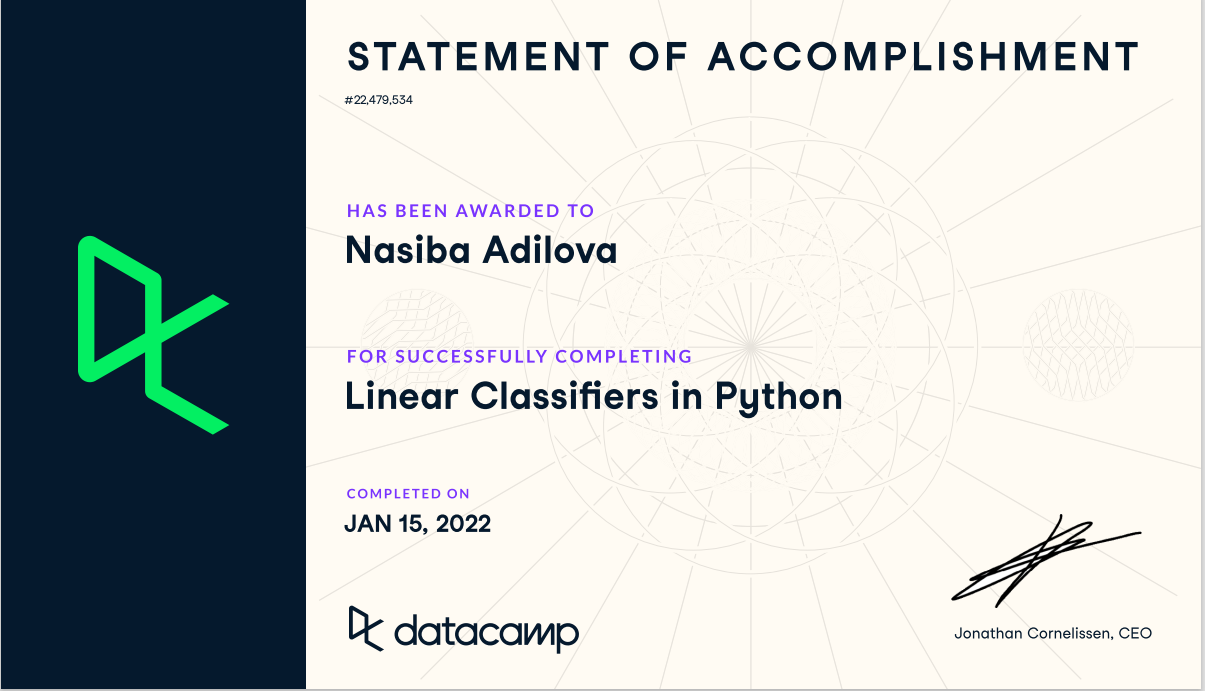